<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL_20241S/blob/main/Logistic_Regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset - Titanic

In [2]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [3]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [4]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

Этот  код удаляет столбец "Id" из наборов данных X_train, Y_train, X_test и Y_test. Он использует метод .drop() для удаления указанного столбца. Параметр axis=1 указывает, что мы удаляем столбец, а не строку.

In [5]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [6]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

Этот код выполняет операции с массивами данных.

* X_train = X_train.T выполняет транспонирование массива X_train.
* Y_train = Y_train.reshape(1, X_train.shape[1]) изменяет форму массива Y_train на (1, количество столбцов в X_train).

Аналогично, для тестового набора данных:

* X_test = X_test.T выполняет транспонирование массива X_test.
* Y_test = Y_test.reshape(1, X_test.shape[1]) изменяет форму массива Y_test на (1, количество столбцов в X_test).

In [7]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)


# Logistic Regression Overview :

## Equations :

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

$ B = single$  $weight/parameter $

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$


$\sigma = \frac{1}{(1 + e^{-x})}  $   ......... (sigmoid function)


A = $\sigma ( W^T*X + b ) $    ........ (probabilistic predictions of shape (1 x m ) )






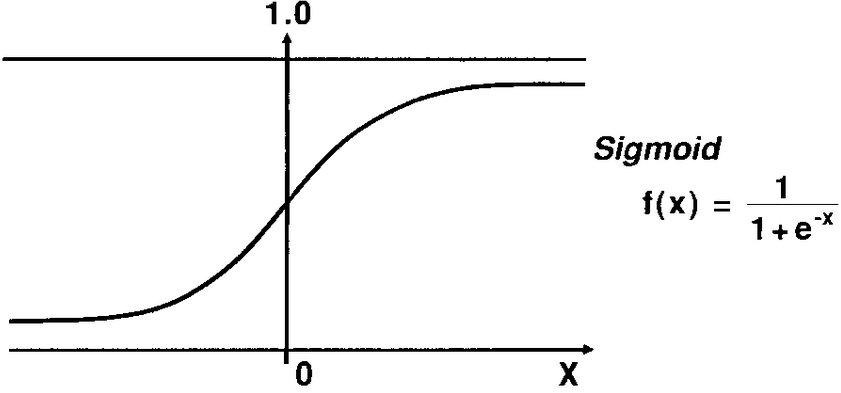


## Cost function :

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

## Gradient Descent

$dW = \frac{\partial COST }{\partial W} = ( A - Y )*X^T $ ...... shape (1 x n)

$dB = \frac{\partial COST }{\partial B} = ( A - Y ) $

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $

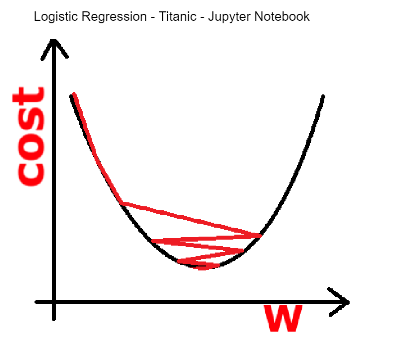

# Model

In [8]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [9]:
def model(X, Y, learning_rate, iterations):

    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B = 0

    cost_list = []

    for i in range(iterations):

        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)

    return W, B, cost_list


In [10]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.49652777693895306
cost after  20000 iteration is :  0.46674868550666
cost after  30000 iteration is :  0.45687787762434423
cost after  40000 iteration is :  0.45288994293089646
cost after  50000 iteration is :  0.45093260252226425
cost after  60000 iteration is :  0.4497708749009468
cost after  70000 iteration is :  0.4489640829216279
cost after  80000 iteration is :  0.44834126966124827
cost after  90000 iteration is :  0.44783045246935776


### Cost vs Iteration
Plotting graph to see if Cost Function is decreasing or not

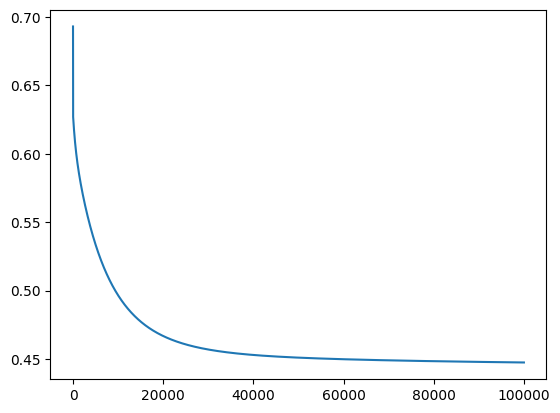

In [11]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

# Testing Model Accuracy

In [12]:
def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")

In [13]:
accuracy(X_test, Y_test, W, B)

Accuracy of the model is :  91.39 %


In [16]:
def predict(X, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    predictions = (A > 0.5).astype(int)
    return predictions

In [50]:
# Пример новых данных для прогнозирования
new_data = np.array([3,	0,	134.5,	0,	0,	7.8292,2])


# Прогнозирование новых данных
new_data_predictions = predict(new_data, W, B)
print(new_data_predictions)

[0]


In [51]:
# Пример новых данных для прогнозирования
new_data = np.array([3,	1,	47.0,	1,	0,	7.0,	1])


# Прогнозирование новых данных
new_data_predictions = predict(new_data, W, B)
print(new_data_predictions)

[0]


In [33]:
import numpy as np

# Создание 10 разных наборов новых данных
new_data_sets = []
for _ in range(10):
    new_data = np.array([3, 0, 134.5, 0, 0, 7.8292, 2])  # Используем заданный набор данных
    perturbation = np.random.normal(0, 51, new_data.shape)  # Добавляем случайный шум к каждому признаку
    new_data_with_perturbation = new_data + perturbation
    new_data_sets.append(new_data_with_perturbation)

# Прогнозирование для каждого набора новых данных
for new_data in new_data_sets:
    new_data_predictions = predict(np.array([new_data]).T, W, B)
    print(new_data_predictions)

[[1]]
[[1]]
[[0]]
[[0]]
[[1]]
[[0]]
[[0]]
[[1]]
[[0]]
[[0]]


In [45]:
from sklearn.impute import SimpleImputer

# Создание объекта импьютации
imputer = SimpleImputer(strategy='mean')  # Можно выбрать другие стратегии, такие как 'median' или 'most_frequent'

# Применение импьютации к обучающему и тестовому наборам данных
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Создание и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train_imputed, Y_train)

# Прогнозирование на тестовом наборе данных
predictions_test = model.predict(X_test_imputed)

# Оценка качества прогнозирования на тестовом наборе
accuracy_test = accuracy_score(Y_test, predictions_test)
print("Accuracy on test set:", accuracy_test)

Accuracy on test set: 0.9521531100478469


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

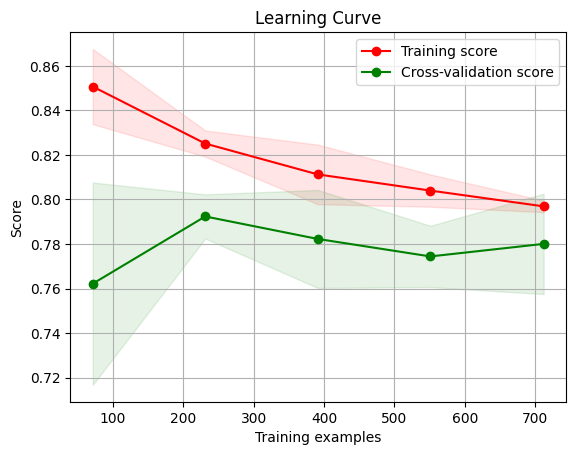

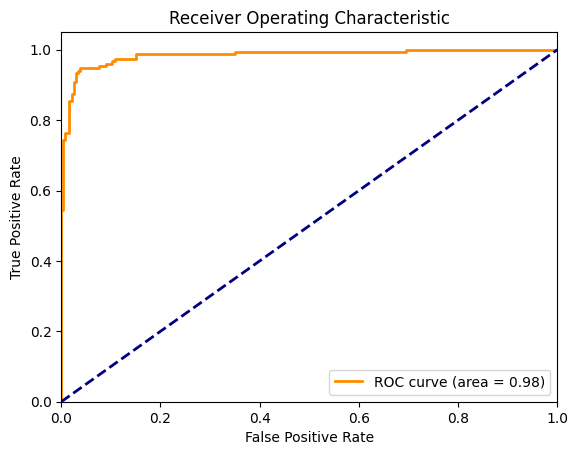

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Функция для построения кривой обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Функция для построения ROC-кривой
def plot_roc_curve(estimator, X_test, y_test):
    probas_ = estimator.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    return plt

# Создание модели и обучение
model = LogisticRegression()
model.fit(X_train_imputed, Y_train)

# Построение кривой обучения
cv = StratifiedKFold(n_splits=5)
plot_learning_curve(model, "Learning Curve", X_train_imputed, Y_train, cv=cv)

# Построение ROC-кривой
plot_roc_curve(model, X_test_imputed, Y_test)

plt.show()


In [57]:
# Пример новых данных для прогнозирования
new_data = np.array([[3, 0, 134.5, 0, 0, 7.92, 0]])

# Прогнозирование на основе новых данных
prediction_new_data = model.predict(new_data)
print("Prediction for new data:", prediction_new_data)

Prediction for new data: [0]


In [59]:
import numpy as np

# Создание 10 разных наборов новых данных
new_data_sets = []
for _ in range(10):
    new_data = np.array([3, 0, 134.5, 0, 0, 7.8292, 1])  # Используем заданный набор данных
    perturbation = np.random.normal(0, 51, new_data.shape)  # Добавляем случайный шум к каждому признаку
    new_data_with_perturbation = new_data + perturbation
    new_data_sets.append(new_data_with_perturbation)

# Прогнозирование для каждого набора новых данных
for new_data in new_data_sets:
    new_data_predictions = predict(np.array([new_data]).T, W, B)
    print(new_data_predictions)

[[1]]
[[1]]
[[0]]
[[1]]
[[0]]
[[0]]
[[1]]
[[0]]
[[0]]
[[1]]
